In [ ]:
# ======================
# 📌 DOWNLOAD FILES
# ======================
!wget https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv -O Automobile.csv
!wget https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv -O Infrared.csv
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv -O BostonHousing.csv

# ======================
# 📌 IMPORT LIBRARY
# ======================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# ======================
# 📌 EVALUASI FUNCTION
# ======================
def eval_reg(y_true, y_pred, model_name, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} ({dataset_name} - Regresi)")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

def eval_cls(y_true, y_pred, model_name, dataset_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n{model_name} ({dataset_name} - Klasifikasi)")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

# ======================
# 📌 AUTOMOBILE REGRESI
# ======================
auto_df = pd.read_csv('Automobile.csv').replace('?', np.nan).dropna()

# Perbaikan: Konversi hanya kolom numerik
for col in auto_df.columns:
    try:
        auto_df[col] = pd.to_numeric(auto_df[col])
    except:
        pass

X_auto = auto_df.select_dtypes(include=[np.number]).drop(columns=['price'])
y_auto = auto_df['price']
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_auto, y_auto, test_size=0.2, random_state=42)

bag_a = RandomForestRegressor(random_state=42).fit(X_train_a, y_train_a)
boost_a = GradientBoostingRegressor(random_state=42).fit(X_train_a, y_train_a)

eval_reg(y_test_a, bag_a.predict(X_test_a), "Bagging", "Automobile")
eval_reg(y_test_a, boost_a.predict(X_test_a), "Boosting", "Automobile")

# ======================
# 📌 INFRARED REGRESI + KLASIFIKASI
# ======================
infra_df = pd.read_csv('Infrared.csv').dropna()

X_inf = infra_df.select_dtypes(include=[np.number]).drop(columns=infra_df.columns[-1], errors='ignore')
y_inf = pd.to_numeric(infra_df.iloc[:, -1], errors='coerce')
valid_idx = y_inf.notna()
X_inf = X_inf.loc[valid_idx]
y_inf = y_inf.loc[valid_idx]

X_train_ir, X_test_ir, y_train_ir, y_test_ir = train_test_split(X_inf, y_inf, test_size=0.2, random_state=42)

bag_ir = RandomForestRegressor(random_state=42).fit(X_train_ir, y_train_ir)
boost_ir = GradientBoostingRegressor(random_state=42).fit(X_train_ir, y_train_ir)

eval_reg(y_test_ir, bag_ir.predict(X_test_ir), "Bagging", "Infrared")
eval_reg(y_test_ir, boost_ir.predict(X_test_ir), "Boosting", "Infrared")

# Klasifikasi
y_inf_cls = (y_inf > y_inf.median()).astype(int)
X_train_ic, X_test_ic, y_train_ic, y_test_ic = train_test_split(X_inf, y_inf_cls, test_size=0.2, random_state=42)

bag_ic = RandomForestClassifier(random_state=42).fit(X_train_ic, y_train_ic)
boost_ic = GradientBoostingClassifier(random_state=42).fit(X_train_ic, y_train_ic)

eval_cls(y_test_ic, bag_ic.predict(X_test_ic), "Bagging", "Infrared")
eval_cls(y_test_ic, boost_ic.predict(X_test_ic), "Boosting", "Infrared")

# ======================
# 📌 BOSTONHOUSING REGRESI
# ======================
boston_df = pd.read_csv('BostonHousing.csv')
X_bos = boston_df.drop(columns=['medv'])
y_bos = boston_df['medv']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bos, y_bos, test_size=0.2, random_state=42)

bag_b = RandomForestRegressor(random_state=42).fit(X_train_b, y_train_b)
boost_b = GradientBoostingRegressor(random_state=42).fit(X_train_b, y_train_b)

eval_reg(y_test_b, bag_b.predict(X_test_b), "Bagging", "BostonHousing")
eval_reg(y_test_b, boost_b.predict(X_test_b), "Boosting", "BostonHousing")


--2025-06-19 12:18:06--  https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25925 (25K) [text/plain]
Saving to: ‘Automobile.csv’

Automobile.csv      100%[===================>]  25.32K  --.-KB/s    in 0.002s  

2025-06-19 12:18:06 (10.1 MB/s) - ‘Automobile.csv’ saved [25925/25925]

--2025-06-19 12:18:06--  https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HT

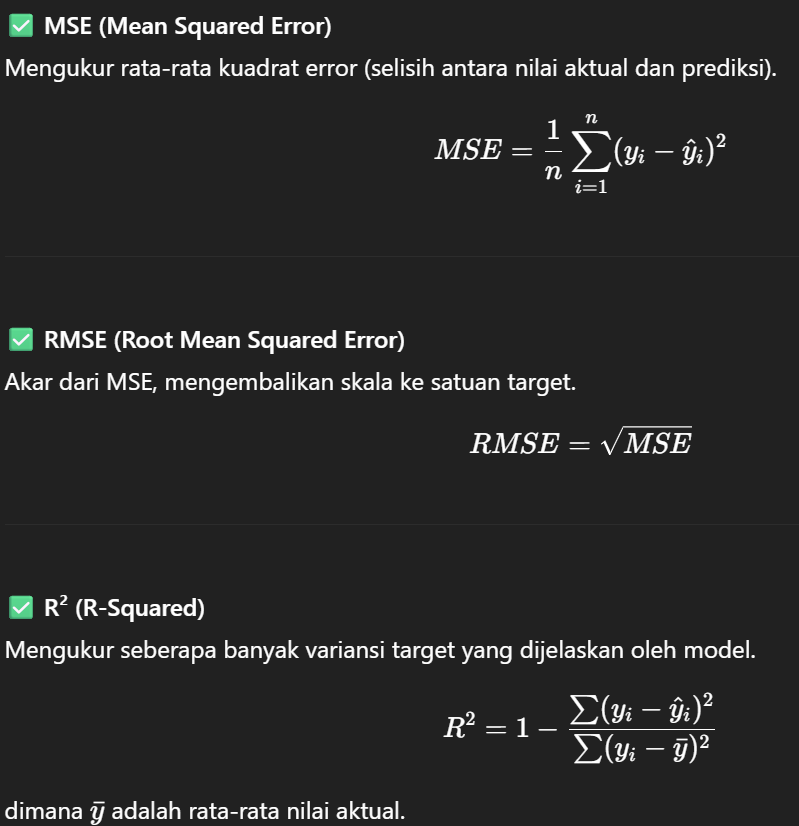